In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('kddcup99_csv.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [4]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


In [5]:
data['label'].value_counts()

smurf              280790
neptune            107201
normal              97277
back                 2203
satan                1589
ipsweep              1247
portsweep            1040
warezclient          1020
teardrop              979
pod                   264
nmap                  231
guess_passwd           53
buffer_overflow        30
land                   21
warezmaster            20
imap                   12
rootkit                10
loadmodule              9
ftp_write               8
multihop                7
phf                     4
perl                    3
spy                     2
Name: label, dtype: int64

In [6]:
R2L=['warezmaster','warezclient','spy','phf','multihop','imap','guess_passwd','ftp_write']

U2R=['rootkit','perl','loadmodule','buffer_overflow']
DoS=['smurf','teardrop','back','land','neptune','pod']
Probe=['ipsweep','nmap','portsweep','satan']

In [7]:
def classify(data,label):
    type=[]
    for i in data['label']:
        if i == 'normal':
            type.append('Normal')
        elif i in R2L:
            type.append('R2L')
        elif i in U2R:
            type.append('U2R')
        elif i in DoS:
            type.append('DoS')
        else:
            type.append('Probe')
    return type
data['check']=classify(data,'label')

In [8]:
data.head(10000)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,check
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal,Normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal,Normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,Normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal,Normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf,DoS
9996,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf,DoS
9997,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf,DoS
9998,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,smurf,DoS


In [9]:
data1 = data[['src_bytes', 'count', 'service', 'srv_count', 'protocol_type',
       'diff_srv_rate', 'same_srv_rate', 'flag', 'dst_bytes',
       'srv_serror_rate', 'logged_in', 'duration', 'lnum_compromised',
       'wrong_fragment', 'is_guest_login', 'num_failed_logins', 'label', 'check']]

In [10]:
data1.rename(columns = {'label':'attack_types', 'check':'label'}, inplace = True) 

C:\Users\yubra\AppData\Local\Temp\ipykernel_10676\1558707122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1.rename(columns = {'label':'attack_types', 'check':'label'}, inplace = True)


In [11]:
data1.head(10000)

,src_bytes,count,service,srv_count,protocol_type,diff_srv_rate,same_srv_rate,flag,dst_bytes,srv_serror_rate,logged_in,duration,lnum_compromised,wrong_fragment,is_guest_login,num_failed_logins,attack_types,label
0,181,8,http,8,tcp,0.0,1.0,SF,5450,0.0,1,0,0,0,0,0,normal,Normal
1,239,8,http,8,tcp,0.0,1.0,SF,486,0.0,1,0,0,0,0,0,normal,Normal
2,235,8,http,8,tcp,0.0,1.0,SF,1337,0.0,1,0,0,0,0,0,normal,Normal
3,219,6,http,6,tcp,0.0,1.0,SF,1337,0.0,1,0,0,0,0,0,normal,Normal
4,217,6,http,6,tcp,0.0,1.0,SF,2032,0.0,1,0,0,0,0,0,normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1032,511,ecr_i,511,icmp,0.0,1.0,SF,0,0.0,0,0,0,0,0,0,smurf,DoS
9996,1032,511,ecr_i,511,icmp,0.0,1.0,SF,0,0.0,0,0,0,0,0,0,smurf,DoS
9997,1032,511,ecr_i,511,icmp,0.0,1.0,SF,0,0.0,0,0,0,0,0,0,smurf,DoS
9998,1032,511,ecr_i,511,icmp,0.0,1.0,SF,0,0.0,0,0,0,0,0,0,smurf,DoS


In [12]:
data1.shape

(494020, 18)

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   src_bytes          494020 non-null  int64  
 1   count              494020 non-null  int64  
 2   service            494020 non-null  object 
 3   srv_count          494020 non-null  int64  
 4   protocol_type      494020 non-null  object 
 5   diff_srv_rate      494020 non-null  float64
 6   same_srv_rate      494020 non-null  float64
 7   flag               494020 non-null  object 
 8   dst_bytes          494020 non-null  int64  
 9   srv_serror_rate    494020 non-null  float64
 10  logged_in          494020 non-null  int64  
 11  duration           494020 non-null  int64  
 12  lnum_compromised   494020 non-null  int64  
 13  wrong_fragment     494020 non-null  int64  
 14  is_guest_login     494020 non-null  int64  
 15  num_failed_logins  494020 non-null  int64  
 16  at

In [14]:
data1['protocol_type'] = data1['protocol_type'].astype('category')
data1['service'] = data1['service'].astype('category')
data1['flag'] = data1['flag'].astype('category')
cat_columns = data1.select_dtypes(['category']).columns
data1[cat_columns] = data1[cat_columns].apply(lambda x: x.cat.codes)

C:\Users\yubra\AppData\Local\Temp\ipykernel_10676\248530944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['protocol_type'] = data1['protocol_type'].astype('category')
C:\Users\yubra\AppData\Local\Temp\ipykernel_10676\248530944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['service'] = data1['service'].astype('category')
C:\Users\yubra\AppData\Local\Temp\ipykernel_10676\248530944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [15]:
data1.head(10000)

,src_bytes,count,service,srv_count,protocol_type,diff_srv_rate,same_srv_rate,flag,dst_bytes,srv_serror_rate,logged_in,duration,lnum_compromised,wrong_fragment,is_guest_login,num_failed_logins,attack_types,label
0,181,8,22,8,1,0.0,1.0,9,5450,0.0,1,0,0,0,0,0,normal,Normal
1,239,8,22,8,1,0.0,1.0,9,486,0.0,1,0,0,0,0,0,normal,Normal
2,235,8,22,8,1,0.0,1.0,9,1337,0.0,1,0,0,0,0,0,normal,Normal
3,219,6,22,6,1,0.0,1.0,9,1337,0.0,1,0,0,0,0,0,normal,Normal
4,217,6,22,6,1,0.0,1.0,9,2032,0.0,1,0,0,0,0,0,normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1032,511,14,511,0,0.0,1.0,9,0,0.0,0,0,0,0,0,0,smurf,DoS
9996,1032,511,14,511,0,0.0,1.0,9,0,0.0,0,0,0,0,0,0,smurf,DoS
9997,1032,511,14,511,0,0.0,1.0,9,0,0.0,0,0,0,0,0,0,smurf,DoS
9998,1032,511,14,511,0,0.0,1.0,9,0,0.0,0,0,0,0,0,0,smurf,DoS


In [16]:
df = data1.drop_duplicates(subset=None, keep='first')

In [17]:
df.isna().sum()

src_bytes            0
count                0
service              0
srv_count            0
protocol_type        0
diff_srv_rate        0
same_srv_rate        0
flag                 0
dst_bytes            0
srv_serror_rate      0
logged_in            0
duration             0
lnum_compromised     0
wrong_fragment       0
is_guest_login       0
num_failed_logins    0
attack_types         0
label                0
dtype: int64

In [18]:
df.shape

(99474, 18)

In [19]:
data1.shape

(494020, 18)

In [20]:
df['label'].value_counts()

Normal    73124
DoS       25216
Probe       699
R2L         385
U2R          50
Name: label, dtype: int64

In [21]:
df['attack_types'].value_counts()

normal             73124
neptune            24259
smurf                460
satan                322
warezclient          320
teardrop             312
portsweep            241
back                 154
ipsweep               77
nmap                  59
buffer_overflow       28
pod                   26
warezmaster           20
guess_passwd          12
imap                  12
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
land                   5
phf                    4
perl                   3
spy                    2
Name: attack_types, dtype: int64

In [22]:
df['label'].value_counts()

Normal    73124
DoS       25216
Probe       699
R2L         385
U2R          50
Name: label, dtype: int64

In [25]:
import matplotlib.pyplot as plt
#import seaborn as sns

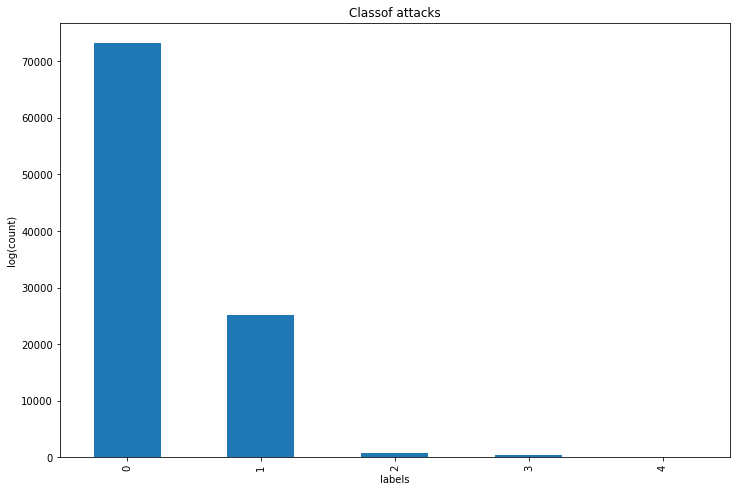

In [124]:
plt.figure(figsize=(12,8))
plt.title('Classof attacks')
df['label'].value_counts().plot(kind='bar')
plt.xlabel("labels")
plt.ylabel("log(count)")
plt.show()


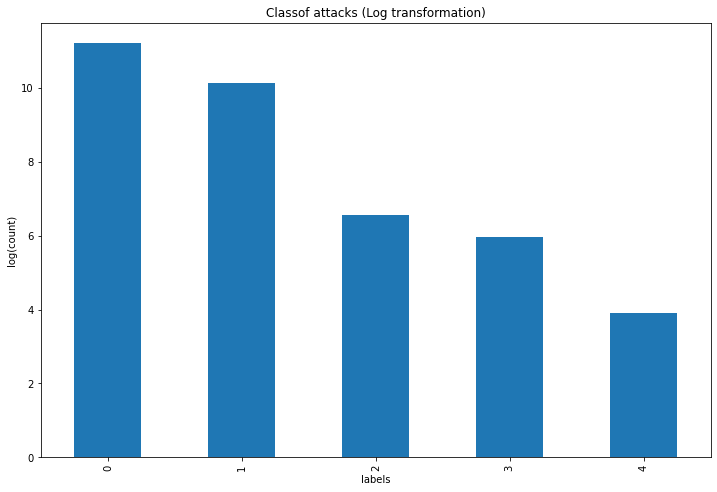

In [125]:
plt.figure(figsize=(12,8))
plt.title('Classof attacks (Log transformation)')
df['label'].value_counts().apply(np.log).plot(kind='bar')
plt.xlabel("labels")
plt.ylabel("log(count)")
plt.savefig('image/class of attacks.png', dpi=500)
plt.show()

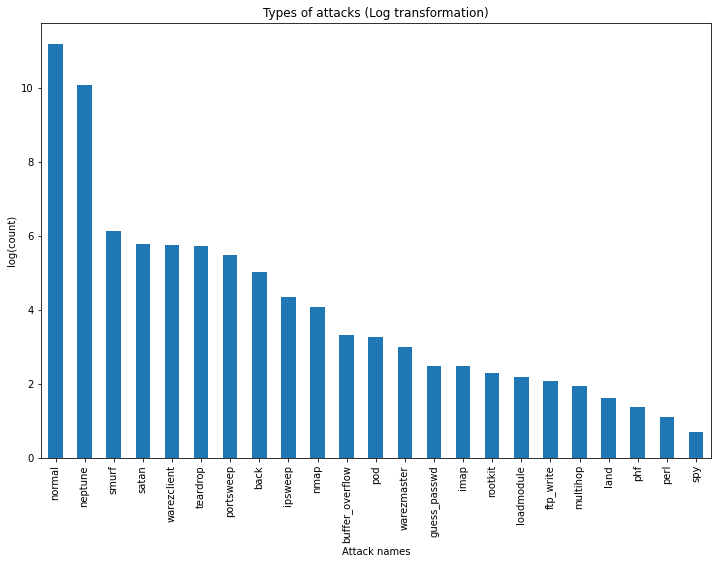

In [28]:
plt.figure(figsize=(12,8))
plt.title("Types of attacks (Log transformation)")
df['attack_types'].value_counts().apply(np.log).plot(kind='bar')
plt.xlabel("Attack names")
plt.ylabel("log(count)")
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99474 entries, 0 to 494019
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   src_bytes          99474 non-null  int64  
 1   count              99474 non-null  int64  
 2   service            99474 non-null  int8   
 3   srv_count          99474 non-null  int64  
 4   protocol_type      99474 non-null  int8   
 5   diff_srv_rate      99474 non-null  float64
 6   same_srv_rate      99474 non-null  float64
 7   flag               99474 non-null  int8   
 8   dst_bytes          99474 non-null  int64  
 9   srv_serror_rate    99474 non-null  float64
 10  logged_in          99474 non-null  int64  
 11  duration           99474 non-null  int64  
 12  lnum_compromised   99474 non-null  int64  
 13  wrong_fragment     99474 non-null  int64  
 14  is_guest_login     99474 non-null  int64  
 15  num_failed_logins  99474 non-null  int64  
 16  attack_types       99

In [30]:
df['label'].value_counts()

Normal    73124
DoS       25216
Probe       699
R2L         385
U2R          50
Name: label, dtype: int64

In [31]:
df.head(10000)

,src_bytes,count,service,srv_count,protocol_type,diff_srv_rate,same_srv_rate,flag,dst_bytes,srv_serror_rate,logged_in,duration,lnum_compromised,wrong_fragment,is_guest_login,num_failed_logins,attack_types,label
0,181,8,22,8,1,0.0,1.0,9,5450,0.0,1,0,0,0,0,0,normal,Normal
1,239,8,22,8,1,0.0,1.0,9,486,0.0,1,0,0,0,0,0,normal,Normal
2,235,8,22,8,1,0.0,1.0,9,1337,0.0,1,0,0,0,0,0,normal,Normal
3,219,6,22,6,1,0.0,1.0,9,1337,0.0,1,0,0,0,0,0,normal,Normal
4,217,6,22,6,1,0.0,1.0,9,2032,0.0,1,0,0,0,0,0,normal,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13937,220,4,22,4,1,0.0,1.0,9,18127,0.0,1,0,0,0,0,0,normal,Normal
13938,220,2,22,2,1,0.0,1.0,9,1262,0.0,1,0,0,0,0,0,normal,Normal
13939,220,12,22,12,1,0.0,1.0,9,18127,0.0,1,0,0,0,0,0,normal,Normal
13940,219,10,22,13,1,0.0,1.0,9,4759,0.0,1,0,0,0,0,0,normal,Normal


In [32]:
attack_map = {'Normal':0, 'DoS':1, 'Probe':2, 'R2L':3, 'U2R':4 }
df['label'] = df['label'].map(attack_map)

C:\Users\yubra\AppData\Local\Temp\ipykernel_10676\3018985988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map(attack_map)


In [33]:
# dummies = pd.get_dummies(df[['label']],drop_first=False)
# df = df.drop(['label'],axis=1)
# df = pd.concat([df,dummies],axis=1)

In [34]:
df.head(10000)

,src_bytes,count,service,srv_count,protocol_type,diff_srv_rate,same_srv_rate,flag,dst_bytes,srv_serror_rate,logged_in,duration,lnum_compromised,wrong_fragment,is_guest_login,num_failed_logins,attack_types,label
0,181,8,22,8,1,0.0,1.0,9,5450,0.0,1,0,0,0,0,0,normal,0
1,239,8,22,8,1,0.0,1.0,9,486,0.0,1,0,0,0,0,0,normal,0
2,235,8,22,8,1,0.0,1.0,9,1337,0.0,1,0,0,0,0,0,normal,0
3,219,6,22,6,1,0.0,1.0,9,1337,0.0,1,0,0,0,0,0,normal,0
4,217,6,22,6,1,0.0,1.0,9,2032,0.0,1,0,0,0,0,0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13937,220,4,22,4,1,0.0,1.0,9,18127,0.0,1,0,0,0,0,0,normal,0
13938,220,2,22,2,1,0.0,1.0,9,1262,0.0,1,0,0,0,0,0,normal,0
13939,220,12,22,12,1,0.0,1.0,9,18127,0.0,1,0,0,0,0,0,normal,0
13940,219,10,22,13,1,0.0,1.0,9,4759,0.0,1,0,0,0,0,0,normal,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99474 entries, 0 to 494019
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   src_bytes          99474 non-null  int64  
 1   count              99474 non-null  int64  
 2   service            99474 non-null  int8   
 3   srv_count          99474 non-null  int64  
 4   protocol_type      99474 non-null  int8   
 5   diff_srv_rate      99474 non-null  float64
 6   same_srv_rate      99474 non-null  float64
 7   flag               99474 non-null  int8   
 8   dst_bytes          99474 non-null  int64  
 9   srv_serror_rate    99474 non-null  float64
 10  logged_in          99474 non-null  int64  
 11  duration           99474 non-null  int64  
 12  lnum_compromised   99474 non-null  int64  
 13  wrong_fragment     99474 non-null  int64  
 14  is_guest_login     99474 non-null  int64  
 15  num_failed_logins  99474 non-null  int64  
 16  attack_types       99

In [36]:
# X=df.drop(['label_DoS','label_Normal','label_Probe','label_U2R','label_R2L','attack_types'],axis=1)
X=df.drop(['attack_types','label'],axis=1)
Y=df['label']
# Y=df[['label_Normal','label_DoS','label_Probe','label_R2L','label_U2R']]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.33,random_state=40)

In [37]:
Y

0         0
1         0
2         0
3         0
4         0
         ..
494015    0
494016    0
494017    0
494018    0
494019    0
Name: label, Length: 99474, dtype: int64

In [38]:
%matplotlib inline

import itertools
import numpy as np

# import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# from sklearn import datasets

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


# from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix, f1_score, \
                            recall_score


from sklearn.multiclass import OneVsRestClassifier
np.random.seed(0)

In [44]:
models = {
    'randomForest':{
        'model':RandomForestClassifier(),
        'params':{
            'n_estimators':[100,200,300]
        }
    },
    'KNN':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors':[3,4,5]
        }
    },
    'DT':{
        'model':DecisionTreeClassifier(criterion='entropy'),
        'params':{
            'max_depth':[4,5,6]
        }
    },
    'gradientBoosting':{
        'model':GradientBoostingClassifier(),
        'params':{
            'n_estimators':[100, 200, 300]
#             'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae'] 
        }
    },
    'adaBoosting':{
        'model':AdaBoostClassifier(),
        'params':{
            'n_estimators':[50, 70, 90]
        }
    },
    'Logistic Regression':{
        'model': LogisticRegression(solver='lbfgs'),
        'params':{
            'max_iter':[1000, 1200, 1300]
        }
    },
    'svm':{
        'model':SVC(gamma='scale'),
        'params':{
            'C':[1,10,20],
            'kernel':['rbf','linear']
        }
    }
}

In [45]:
from tqdm import tqdm

In [46]:
scores = []

for model_name, mp in tqdm(models.items()):
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    print(model_name, clf.best_score_, clf.best_params_)
    scores.append({
        'model':model_name,
        'test_score':clf.best_score_,
        'best params':clf.best_params_
    }
    )

 14%|█▍        | 1/7 [01:43<10:20, 103.45s/it]

randomForest 0.9985145633696293 {'n_estimators': 300}



 29%|██▊       | 2/7 [04:49<12:39, 151.94s/it]

KNN 0.9954386548471463 {'n_neighbors': 3}



 43%|████▎     | 3/7 [04:50<05:32, 83.19s/it] 

DT 0.9976293060435939 {'max_depth': 6}



 57%|█████▋    | 4/7 [18:33<18:45, 375.02s/it]

gradientBoosting 0.9982594905985105 {'n_estimators': 200}



 71%|███████▏  | 5/7 [19:10<08:26, 253.12s/it]

adaBoosting 0.9225905452280244 {'n_estimators': 50}


C:\Users\yubra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 71%|███████▏  | 5/7 [30:06<12:02, 361.35s/it]


KeyboardInterrupt: 

In [47]:
scores

[{'model': 'randomForest',
  'test_score': 0.9985145633696293,
  'best params': {'n_estimators': 300}},
 {'model': 'KNN',
  'test_score': 0.9954386548471463,
  'best params': {'n_neighbors': 3}},
 {'model': 'DT',
  'test_score': 0.9976293060435939,
  'best params': {'max_depth': 6}},
 {'model': 'gradientBoosting',
  'test_score': 0.9982594905985105,
  'best params': {'n_estimators': 200}},
 {'model': 'adaBoosting',
  'test_score': 0.9225905452280244,
  'best params': {'n_estimators': 50}}]

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
models={
    "Random Forest": RandomForestClassifier(n_estimators=300),
    "KNN" : KNeighborsClassifier(n_neighbors=3),
    "SVM": SVC(gamma= 'scale'),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy' ,max_depth=6),
    "Logistic Regression": LogisticRegression(solver='lbfgs', max_iter=1200000),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=200),
    "AdaBoost": AdaBoostClassifier(n_estimators=50)
}
for i in tqdm(range(len(list(models)))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) #training model
    
    #Make predictions 
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred, average='weighted')
    model_train_f1score = f1_score(y_train, y_train_pred, average='weighted')
    model_train_recall = recall_score(y_train, y_train_pred, average='weighted')
    model_train_mean_square = mean_squared_error(y_train, y_train_pred)
#     model_train_rocauc_score = roc_auc_score(y_train, y_train_pred)
    
    
    #test set performance
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_precision = precision_score(y_test, y_test_pred, average='weighted')
    model_test_f1score = f1_score(y_test, y_test_pred, average='weighted')
    model_test_recall = recall_score(y_test, y_test_pred, average='weighted')
    model_test_mean_square = mean_squared_error(y_test, y_test_pred)
    
#     model_test_rocauc_score = roc_auc_score(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for training set')
    print("- Accuracy : {:.4f}".format(model_train_accuracy))
    print("- Precision : {:.4f}".format(model_train_precision))
    print("- F1 Score : {:.4f}".format(model_train_f1score))
    print("- Recall : {:.4f}".format(model_train_recall))
    print("- Mean Squared Error : {:.4f}".format(model_train_mean_square))
    
#     print("- Roc_Auc Score : {:.4f}".format(model_train_rocauc_score))
    
    
    print("------------------------------------------")
    
    print('Model performance for test set')
    print("- Accuracy : {:.4f}".format(model_test_accuracy))
    print("- Precision : {:.4f}".format(model_test_precision))
    print("- F1 Score : {:.4f}".format(model_test_f1score))
    print("- Recall : {:.4f}".format(model_test_recall))
    print("- Mean Squared Error : {:.4f}".format(model_test_mean_square))
    
#     print("- Roc_Auc Score : {:.4f}".format(model_test_rocauc_score))
    
    print('='*35)
    print('\n')


 14%|█▍        | 1/7 [00:13<01:19, 13.33s/it]

Random Forest
Model performance for training set
- Accuracy : 0.9999
- Precision : 0.9999
- F1 Score : 0.9999
- Recall : 0.9999
- Mean Squared Error : 0.0004
------------------------------------------
Model performance for test set
- Accuracy : 0.9987
- Precision : 0.9986
- F1 Score : 0.9986
- Recall : 0.9987
- Mean Squared Error : 0.0099





 29%|██▊       | 2/7 [01:58<05:37, 67.52s/it]

KNN
Model performance for training set
- Accuracy : 0.9975
- Precision : 0.9974
- F1 Score : 0.9974
- Recall : 0.9975
- Mean Squared Error : 0.0105
------------------------------------------
Model performance for test set
- Accuracy : 0.9961
- Precision : 0.9958
- F1 Score : 0.9958
- Recall : 0.9961
- Mean Squared Error : 0.0159




C:\Users\yubra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
 57%|█████▋    | 4/7 [11:23<08:54, 178.28s/it]

SVM
Model performance for training set
- Accuracy : 0.7371
- Precision : 0.5538
- F1 Score : 0.6260
- Recall : 0.7371
- Mean Squared Error : 0.3182
------------------------------------------
Model performance for test set
- Accuracy : 0.7327
- Precision : 0.5402
- F1 Score : 0.6202
- Recall : 0.7327
- Mean Squared Error : 0.3221


Decision Tree
Model performance for training set
- Accuracy : 0.9982
- Precision : 0.9982
- F1 Score : 0.9981
- Recall : 0.9982
- Mean Squared Error : 0.0139
------------------------------------------
Model performance for test set
- Accuracy : 0.9978
- Precision : 0.9978
- F1 Score : 0.9976
- Recall : 0.9978
- Mean Squared Error : 0.0153




C:\Users\yubra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

 71%|███████▏  | 5/7 [12:13<04:24, 132.11s/it]

Logistic Regression
Model performance for training set
- Accuracy : 0.9682
- Precision : 0.9608
- F1 Score : 0.9632
- Recall : 0.9682
- Mean Squared Error : 0.0797
------------------------------------------
Model performance for test set
- Accuracy : 0.9694
- Precision : 0.9616
- F1 Score : 0.9645
- Recall : 0.9694
- Mean Squared Error : 0.0786





 86%|████████▌ | 6/7 [13:18<01:49, 109.28s/it]

Gradient Boosting
Model performance for training set
- Accuracy : 0.9997
- Precision : 0.9997
- F1 Score : 0.9997
- Recall : 0.9997
- Mean Squared Error : 0.0022
------------------------------------------
Model performance for test set
- Accuracy : 0.9986
- Precision : 0.9985
- F1 Score : 0.9986
- Recall : 0.9986
- Mean Squared Error : 0.0113




C:\Users\yubra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
100%|██████████| 7/7 [13:21<00:00, 114.53s/it]

AdaBoost
Model performance for training set
- Accuracy : 0.9761
- Precision : 0.9649
- F1 Score : 0.9704
- Recall : 0.9761
- Mean Squared Error : 0.0690
------------------------------------------
Model performance for test set
- Accuracy : 0.9768
- Precision : 0.9659
- F1 Score : 0.9713
- Recall : 0.9768
- Mean Squared Error : 0.0691




In [86]:
clf1 =  RandomForestClassifier(n_estimators=300)
clf2 = KNeighborsClassifier(n_neighbors=3) 
clf3 = SVC(gamma='scale')
clf4 = DecisionTreeClassifier(criterion='entropy', max_depth=6)
clf5 = LogisticRegression(solver='lbfgs',max_iter=1200000)
clf6 = GradientBoostingClassifier(n_estimators=200)
clf7 = AdaBoostClassifier(n_estimators=50)

In [87]:
# import seaborn as sns
# def func_confusion_matrix(cm):
#     cm = confusion_matrix(ytt, pred)
#     sns.heatmap(cm, cmap="Greens", xticklabels=['normal','DOS', "Probe", 'R2L', 'U2R'], yticklabels=['normal','DOS', "Probe", 'R2L', 'U2R'])
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')

In [79]:
ytt= y_test.to_numpy()
print(type(ytt))
clf1.fit(X_train, y_train)
pred= clf1.predict(X_test)
print(type(pred))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [92]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

label = ['Random Forest', 'K-NN',  'Gradient Boosting','AdaBoost','Support Vector', 'Decision Tree' , 'Logistic Regression']
clf_list = [clf1,clf2,clf6, clf7,clf3,clf4,clf5]

gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)


for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X_train, y_train, cv=3, scoring='accuracy')
    print("Accuracy: %.4f (+/- %.4f) [%s]" %(scores.mean(), scores.std(), label))
    m = OneVsRestClassifier(clf)
    m.fit(X_train,y_train )
    pred=m.predict(X_test)
    print(classification_report(y_test,pred))
    ytt=y_test.to_numpy()
    #ptt=pred.to_numpy()
    print(confusion_matrix(ytt,pred))
#     disp.plot()

Accuracy: 0.9985 (+/- 0.0002) [Random Forest]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24034
           1       1.00      1.00      1.00      8427
           2       0.97      0.95      0.96       218
           3       0.97      0.92      0.95       132
           4       0.86      0.38      0.52        16

    accuracy                           1.00     32827
   macro avg       0.96      0.85      0.89     32827
weighted avg       1.00      1.00      1.00     32827

[[24023     3     4     3     1]
 [    0  8425     1     1     0]
 [    9     1   208     0     0]
 [   10     0     0   122     0]
 [    8     0     2     0     6]]
Accuracy: 0.9951 (+/- 0.0002) [K-NN]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24034
           1       0.99      1.00      1.00      8427
           2       0.89      0.70      0.79       218
           3       0.94      0.90      0.92  

In [93]:
import pickle 

In [94]:
filename = 'Trained_Model.sav'

In [95]:
pickle.dump(m, open(filename, 'wb'))

In [96]:
loaded_model = pickle.load(open(filename, 'rb'))

In [97]:
new = X_test.to_numpy()

In [98]:
new[10001]

array([281.,  14.,  22.,  15.,   1.,   0.,   1.,   9., 440.,   0.,   1.,
         0.,   0.,   0.,   0.,   0.])

In [99]:
for i in range(0,100):
    result = loaded_model.predict([new[i]])
    print(result)
    if result == 0:
        print('Normal')

    if result == 1:
        print('DoS')

    if result == 2:
        print('Probe')


    if result == 3:
        print('R2L')

    if result == 4:
        print('U2R')

C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

[0]
Normal
[1]
DoS
[0]
Normal
[0]
Normal
[0]
Normal
[1]
DoS
[0]
Normal


C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

[0]
Normal
[0]
Normal
[1]
DoS
[0]
Normal
[1]
DoS
[0]
Normal
[0]
Normal


C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

[0]
Normal
[0]
Normal
[0]
Normal
[0]
Normal
[0]
Normal
[1]
DoS
[0]
Normal


C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

[0]
Normal
[0]
Normal
[0]
Normal
[0]
Normal
[1]
DoS
[0]
Normal
[0]
Normal


C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

[1]
DoS
[1]
DoS
[0]
Normal
[0]
Normal
[3]
R2L
[0]
Normal
[0]
Normal


C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

[0]
Normal
[1]
DoS
[0]
Normal
[0]
Normal
[0]
Normal
[0]
Normal
[0]
Normal
[0]

C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d


Normal
[0]
Normal
[1]
DoS
[1]
DoS
[0]
Normal
[1]
DoS
[1]
DoS
[0]
Normal


C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

[0]
Normal
[0]
Normal
[1]
DoS
[0]
Normal
[0]
Normal
[0]
Normal
[0]
Normal


C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

[0]
Normal
[0]
Normal
[0]
Normal
[0]
Normal
[0]
Normal
[0]
Normal
[1]
DoS


C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

[1]
DoS
[1]
DoS
[0]
Normal
[0]
Normal
[1]
DoS
[0]
Normal
[1]
DoS


C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

[0]
Normal
[1]
DoS
[1]
DoS
[0]
Normal
[0]
Normal
[0]
Normal
[0]
Normal


C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

[0]
Normal
[0]
Normal
[0]
Normal
[1]
DoS
[1]
DoS
[1]
DoS
[1]
DoS


C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

[1]
DoS
[0]
Normal
[0]
Normal
[0]
Normal
[0]
Normal
[1]
DoS
[0]
Normal


C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

[1]
DoS
[0]
Normal
[0]
Normal
[0]
Normal
[0]
Normal
[0]
Normal
[0]
Normal
[0]
Normal


C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\yubra\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X d

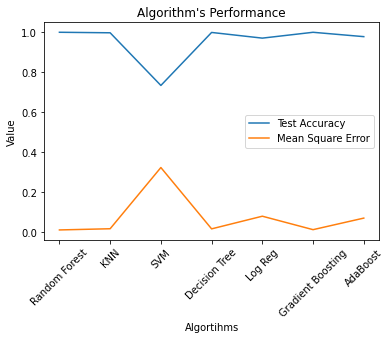

In [142]:
import matplotlib.pyplot as plt

# Sample data
models = ['Random Forest', 'KNN', 'SVM', 'Decision Tree', 'Log Reg', 'Gradient Boosting', 'AdaBoost']
acc_test = [0.9987, 0.9961, 0.7327, 0.9978, 0.9694, 0.9986, 0.9768]
Mse_loss = [0.0099, 0.0159, 0.3221, 0.0153, 0.0786, 0.0113, 0.0691]

# Create figure and axis objects
fig, ax = plt.subplots()

# Plot lines for accuracy and loss on the same axis
ax.plot(models, acc_test, label='Test Accuracy')
ax.plot(models, Mse_loss, label='Mean Square Error')

# Add labels and legend
ax.set_xlabel('Algortihms')
ax.set_ylabel('Value')
ax.set_title("Algorithm's Performance")
ax.legend()

plt.xticks(rotation=45)
plt.savefig('image/model performance.png',dpi=600, bbox_inches='tight')

# Display the plot
plt.show()


C:\Users\yubra\AppData\Local\Temp\ipykernel_10676\1580404320.py:20: UserWarning: Legend does not support [<matplotlib.lines.Line2D object at 0x0000022592F15850>] instances.
A proxy artist may be used instead.
See: https://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  plt.legend( (bar1, bar2), ('Train', 'Test') )


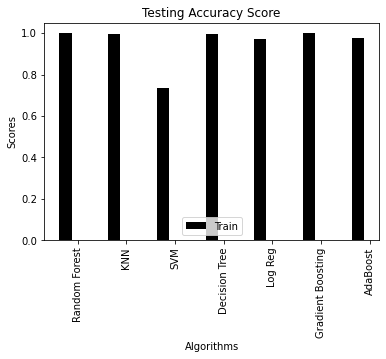

In [143]:

acc_test = [0.9987, 0.9961, 0.7327, 0.9978, 0.9694, 0.9986, 0.9768]
# Mse_loss = [0.0099, 0.0159, 0.3221, 0.0153, 0.0786, 0.0113, 0.0691]



N = 7
ind = np.arange(N) 
width = 0.25
models = ['Random Forest', 'KNN', 'SVM', 'Decision Tree', 'Log Reg', 'Gradient Boosting', 'AdaBoost']

bar1 = plt.bar(ind, acc_test, width, color = 'black')
  
# bar2 = plt.bar(ind+width, acc_test, width, color='red')
  
plt.xlabel("Algorithms")
plt.ylabel('Scores')
plt.title("Testing Accuracy Score")
  
plt.xticks(ind+width,['Random Forest', 'KNN', 'SVM', 'Decision Tree', 'Log Reg', 'Gradient Boosting', 'AdaBoost'], rotation=90)
plt.legend( (bar1, bar2), ('Train', 'Test') )
plt.savefig('image/testing accuracy bar graph.png', dpi=400, bbox_inches='tight')
plt.show()

# plt.plot(models, acc_test, label='Accuracy')
# plt.plot(models, Mse_loss, label = 'Loss')
# plt.legend('Accuracy', 'loss')
# plt.plot(models, precision_train, label='Train')
# plt.plot(models, precision_test, label='Test')
